# Color Quatization using K-Means

Fitting model on a small sub-sample of the data
done in 0.022s.
Predicting color indices on the full image (k-means)
done in 0.011s.
Predicting color indices on the full image (random)
done in 0.016s.


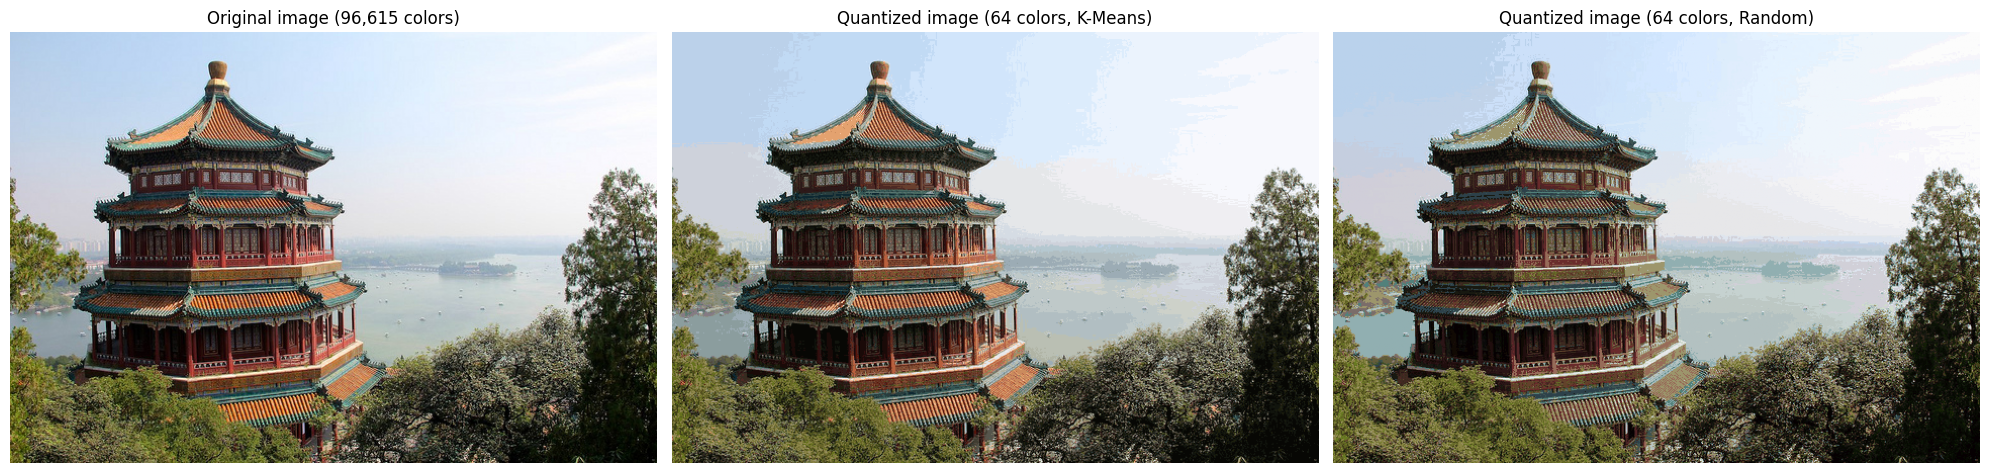

In [3]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

n_colors = 64

# Load the Summer Palace photo
china = load_sample_image("china.jpg")

# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print(f"done in {time() - t0:0.3f}s.")

# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print(f"done in {time() - t0:0.3f}s.")

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
print(f"done in {time() - t0:0.3f}s.")

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

# Crear una nueva figura con 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 7))

# Mostrar la imagen original
ax1.imshow(china)
ax1.set_title("Original image (96,615 colors)")
ax1.axis("off")

# Mostrar la imagen cuantizada con K-Means
ax2.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))
ax2.set_title(f"Quantized image ({n_colors} colors, K-Means)")
ax2.axis("off")

# Mostrar la imagen cuantizada con colores aleatorios
ax3.imshow(recreate_image(codebook_random, labels_random, w, h))
ax3.set_title(f"Quantized image ({n_colors} colors, Random)")
ax3.axis("off")

# Ajustar el espacio entre subplots
plt.tight_layout()

# Guardar la figura combinada
plt.savefig('ex3.png')

# Mostrar la figura
plt.show()